###Importing Libraries

In [1]:
!pip install transformers
!pip install emoji
!pip install sentencepiece
!pip install nltk
!pip install emot==3.1

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/137.6 kB ? eta -:--:--
     -------- ------------------------------- 30.7/137.6 kB ? eta -:--:--
     -------- ------------------------------- 30.7/137.6 kB ? eta -:--:--
     ---------------- -------------------- 61.4/137.6 kB 469.7 kB/s eta 0:00:01
     ---------------- -------------------- 61.4/137.6 kB 469.7 kB/s eta 0:00:01
     ----------------------------- ------ 112.6/137.6 kB 467.6 kB/s eta 0:00:01
     ----------------------------- ------ 112.6/137.6 kB 467.6 kB/s eta 0:00:01
     ------------------------------------ 137.6/137.6 kB 406.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/9.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.0 MB 660.6 kB/s eta 0:00:14
   ---------------------------------------- 0.1/9.0 MB 544.7 kB/s eta 0:00:17
   ---------------------------------------- 0.1/9.0 MB 655.4 kB/s eta 0:00:1

In [2]:
import pandas as pd
import numpy as np

# visualization
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.decomposition import LatentDirichletAllocation
from collections import Counter
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.4f}'.format

import io
from datetime import timedelta

# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline
import re
import emoji
from tqdm.notebook import tqdm
tqdm.pandas()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\deepp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


###Loading Data

In [9]:
path1 = 'D:/IIITR Class Docs/6th Sem/Mini Project/Code/Turkey_06-02-2023_eartquake_Tweets-main/depremGun1en.csv'
path2 = 'D:/IIITR Class Docs/6th Sem/Mini Project/Code/Turkey_06-02-2023_eartquake_Tweets-main/depremGun1en_V2.csv'
path3 = 'D:/IIITR Class Docs/6th Sem/Mini Project/Code/Turkey_06-02-2023_eartquake_Tweets-main/depremGun2en.csv'
path4 = 'D:/IIITR Class Docs/6th Sem/Mini Project/Code/Turkey_06-02-2023_eartquake_Tweets-main/depremGun2en_V2.csv'
path5 = 'D:/IIITR Class Docs/6th Sem/Mini Project/Code/Turkey_06-02-2023_eartquake_Tweets-main/depremGun3en.csv'
path6 = 'D:/IIITR Class Docs/6th Sem/Mini Project/Code/Turkey_06-02-2023_eartquake_Tweets-main/depremGun3en_V2.csv'
path7 = 'D:/IIITR Class Docs/6th Sem/Mini Project/Code/Turkey_06-02-2023_eartquake_Tweets-main/depremGun4en.csv'
path8 = 'D:/IIITR Class Docs/6th Sem/Mini Project/Code/Turkey_06-02-2023_eartquake_Tweets-main/depremGun4en_V2.csv'
path9 = 'D:/IIITR Class Docs/6th Sem/Mini Project/Code/Turkey_06-02-2023_eartquake_Tweets-main/depremGun5en.csv'
path10 = 'D:/IIITR Class Docs/6th Sem/Mini Project/Code/Turkey_06-02-2023_eartquake_Tweets-main/depremGun5en_V2.csv'

df1 = pd.read_csv(path1)
df2 = pd.read_csv(path2)
df3 = pd.read_csv(path3)
df4 = pd.read_csv(path4)
df5 = pd.read_csv(path5)
df6 = pd.read_csv(path6)
df7 = pd.read_csv(path7)
df8 = pd.read_csv(path8)
df9 = pd.read_csv(path9)
df10 = pd.read_csv(path10)

In [13]:
dfs = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10]

c_df = pd.concat(dfs)
sorted_df = c_df.sort_values(by='Date')

In [14]:
sorted_df.head()

url       username  \
8179  https://twitter.com/BrainstormBot/status/16224...  BrainstormBot   
8178  https://twitter.com/LastQuake/status/162240463...      LastQuake   
8177  https://twitter.com/mgovcee/status/16224049103...        mgovcee   
8176  https://twitter.com/LastQuake/status/162240509...      LastQuake   
8175  https://twitter.com/gs_ossie_1905/status/16224...  gs_ossie_1905   

                           Date  \
8179  2023-02-06 01:18:56+00:00   
8178  2023-02-06 01:19:42+00:00   
8177  2023-02-06 01:20:48+00:00   
8176  2023-02-06 01:21:33+00:00   
8175  2023-02-06 01:22:05+00:00   

                                                  Tweet  \
8179  ❗ DEPREM UYARISI / EARTHQUAKE WARNING for Turk...   
8178  ⚠Preliminary info:  ( about 30 km N of  ( 2 mi...   
8177                                          Gaziantep   
8176  ⚠Preliminary info: M7.2  ( about 30 km N of  (...   
8175                                         Kayseride    

                                           hashtag mentions  likeCount  \
8179                         ['Deprem', 'Kösreli']     none          9   
8178  ['earthquake', 'deprem', 'Mercin', 'Turkey']     none        307   
8177                                    ['deprem']     none          0   
8176  ['earthquake', 'deprem', 'Mercin', 'Turkey']     none        104   
8175                                    ['deprem']     none          0   

      retweetCount  replyCount  
8179             3           2  
8178           136          28  
8177             0           0  
8176            75           3  
8175             0           0

In [15]:
output_path = 'sorted_data.csv'

# Save the DataFrame as a CSV file
sorted_df.to_csv(output_path, index=False)

### Data Exploration

In [6]:
def info(dataframe):
    print('Dataset size :', df.shape)
    print("# -------------------------------------------- #", "\n")
    print('Shape :', df.info())
    print("# -------------------------------------------- #", "\n")
    print('Shape :', df.describe())
    print("# -------------------------------------------- #", "\n")
    buf = io.StringIO()
    pd.read_csv(path).info(buf=buf)
    info = buf.getvalue().split('\n')[-2].split(":")[1].strip()
    print('Memory usage : ', info)
    print("# -------------------------------------------- #", "\n")

info(df)

Dataset size : (8180, 9)
# -------------------------------------------- # 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8180 entries, 0 to 8179
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   url           8180 non-null   object
 1   username      8180 non-null   object
 2   Date          8180 non-null   object
 3   Tweet         8180 non-null   object
 4   hashtag       8180 non-null   object
 5   mentions      8180 non-null   object
 6   likeCount     8180 non-null   int64 
 7   retweetCount  8180 non-null   int64 
 8   replyCount    8180 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 575.3+ KB
Shape : None
# -------------------------------------------- # 

Shape :        likeCount  retweetCount  replyCount
count  8180.0000     8180.0000   8180.0000
mean     39.7480       17.0169      1.6630
std     609.6330      263.7192     16.7072
min       0.0000        0.0000      0.0000
25%       0.0000 

In [ ]:
# Let's take a look at the most used languages
df_language = df['language'].value_counts()
df_language[:5]

en     173361
tr     134589
qme     36983
ar      16080
qht     12495
Name: language, dtype: int64

In [ ]:
df['source'].value_counts().head()

Twitter for Android    205586
Twitter for iPhone     119452
Twitter Web App         77576
TweetDeck                5311
emsc-csem                3755
Name: source, dtype: int64

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.date
df.head()

date                                            content  \
0  2023-02-21  तुर्की में सोमवार देर रात भूंकप के तेज झटके मह...   
1  2023-02-21  New search &amp; rescue work is in progress in...   
2  2023-02-21  Can't imagine those who still haven't recovere...   
3  2023-02-21  its a highkey sign for all of us to ponder ove...   
4  2023-02-21  Turkiye Earthquake: तुर्किए में फिर आया भूकंप ...   

                                            hashtags  like_count  rt_count  \
0  ['ATDigital', 'Turkey', 'Earthquake', 'TurkeyE...      0.0000    0.0000   
1  ['Hatay', 'earthquakes', 'Türkiye', 'TurkiyeQu...      1.0000    0.0000   
2  ['Turkey', 'earthquake', 'turkeyearthquake2023...      0.0000    0.0000   
3    ['turkeyearthquake2023', 'earthquake', 'Syria']      0.0000    0.0000   
4  ['turkey', 'earthquake', 'turkiye', 'india', '...      0.0000    0.0000   

   followers_count isVerified language coordinates place                source  
0    19727712.0000       True       hi         NaN   NaN  Twitter Media Studio  
1        5697.0000       True       en         NaN   NaN       Twitter Web App  
2           1.0000      False       en         NaN   NaN   Twitter for Android  
3           3.0000      False       en         NaN   NaN   Twitter for Android  
4          17.0000      False      und         NaN   NaN   Twitter for Android

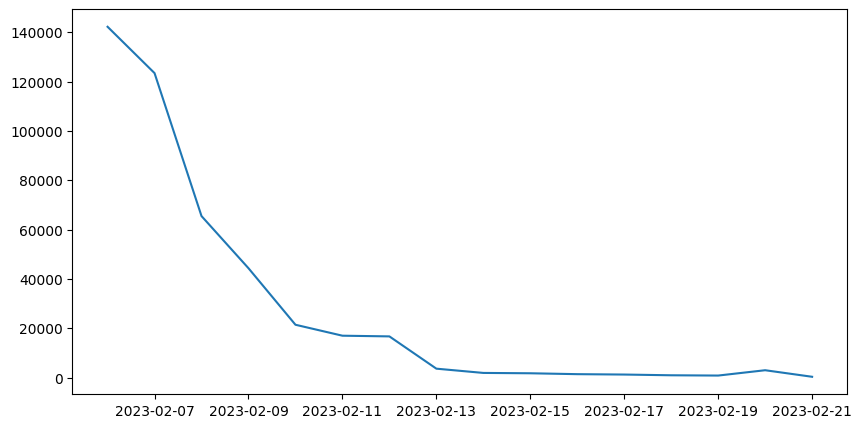

In [ ]:
# tweeting trend by day
df['date'].value_counts().plot(figsize=(10,5));

In [ ]:
# We'll go on just Turkish tweets
df = df[df.language =='tr']

In [ ]:
df.head()

date                                            content  \
180  2023-02-21  Hayatını kaybeden çocukların anısına bazı enka...   
192  2023-02-21  Vatan hainleri yine TAG açmış: #70ildeOkullarK...   
213  2023-02-21  2023 Bizi Sal Artık 🤦🏻‍♀️   #earthquake #turke...   
219  2023-02-21  Türkiye'nin Güneyi ve Suriye'de 6.4 büyüklüğün...   
257  2023-02-21  Selocum onlar istifa etmiyor. Devlet malı deni...   

                                              hashtags  like_count  rt_count  \
180  ['earthquake', 'DEPREMANI', 'depremoldu', 'dep...      1.0000    0.0000   
192  ['70ildeOkullarKapatılsın', 'deprem', 'earthqu...      3.0000    1.0000   
213  ['earthquake', 'turkeyearthquake2023', 'Turkey...      0.0000    0.0000   
219                  ['Turkey', 'earthquake', 'Syria']      0.0000    0.0000   
257  ['earthquake', 'Erdbeben', 'depremoldu', 'Turk...      0.0000    0.0000   

     followers_count isVerified language  \
180         149.0000      False       tr   
192           0.0000      False       tr   
213        1252.0000      False       tr   
219        3338.0000      False       tr   
257         297.0000      False       tr   

                                           coordinates  \
180                                                NaN   
192                                                NaN   
213                                                NaN   
219                                                NaN   
257  Coordinates(longitude=40.149462, latitude=37.8...   

                                                 place               source  
180                                                NaN  Twitter for Android  
192                                                NaN   Twitter for iPhone  
213                                                NaN  Twitter for Android  
219                                                NaN  Twitter for Android  
257  Place(fullName='Diyarbakır, Türkiye', name='Di...  Twitter for Android

In [ ]:
df.shape

(134589, 11)

In [ ]:
# remove duplicate tweets
df.drop_duplicates('content', inplace=True)
df.shape

(132934, 11)

###Data Cleaning

In [ ]:
def preprocess_word(word):
    
    # Convert more than 2 letter repetitions to 2 letter
    word = re.sub(r'(.)\1+', r'\1\1', word)
    # Remove - & '
    word = re.sub(r'(-|\')', '', word)
    return word

def is_valid_word(word):
    # Check the validity of the word according to the Turkish alphabet
    return (re.search(r'^[a-zA-Z0-9ğüışöçIİĞÜŞÖÇ]+$', word) is not None)

def remove_emoji(tweet):
  
  # Positive emojis
  tweet = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\)|:\s?D|:-D|x-?D|X-?D|<3|:\*)', '', tweet)
  # Negative emojis
  tweet = re.sub(r'(;-?\)|;-?D|\(-?;)|:\s?\(|:-\(|\)\s?:|\)-:|:,\(|:\'\(|:"\(', '', tweet)

  emoji_pattern = re.compile(
    '['
    u'\U0001F600-\U0001F64F'  # emoticons
    u'\U0001F300-\U0001F5FF'  # symbols & pictographs
    u'\U0001F680-\U0001F6FF'  # transport & map symbols
    u'\U0001F1E0-\U0001F1FF'  # flags (iOS)
    u'\U00002702-\U000027B0'
    u'\U000024C2-\U0001F251'
    ']+',
    flags=re.UNICODE)
  
  tweet = emoji_pattern.sub(r'', tweet)
  
  return tweet

def preprocess_tweet(tweet):
    processed_tweet = []
    # Convert to lower case
    tweet = tweet.lower()
    
    #Clean only digits
    tweet = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", tweet)

    # Remove URLs, user mentions and hashtags
    tweet = re.sub(r'((www\.[\S]+)|(https?://[\S]+)|(@[\S]+)|(#(\S+)))', '', tweet)
    
    # Remove RT (retweet)
    tweet = re.sub(r'\brt\b', '', tweet)
    
    # Replace 2+ dots with space
    tweet = re.sub(r'\.{2,}', ' ', tweet)
    
    # Strip space, " and ' from tweet
    tweet = tweet.strip(' "\'')

    #remove emojis
    tweet = remove_emoji(tweet)
    
    # Replace multiple spaces with a single space
    tweet = re.sub(r'\s+', ' ', tweet)
    words = tweet.split()

    for word in words:
      word = preprocess_word(word)
      if is_valid_word(word):      
        processed_tweet.append(word)

    return ' '.join(processed_tweet)

In [ ]:
df["content"] = df.content.map(preprocess_tweet)

In [ ]:
df.head()

date                                            content  \
180  2023-02-21  hayatını kaybeden çocukların anısına bazı enka...   
192  2023-02-21  vatan hainleri yine tag en okullar açik açik m...   
213  2023-02-21                                     bizi sal artık   
219  2023-02-21  türkiyenin güneyi ve suriyede büyüklüğündeki d...   
257  2023-02-21  selocum onlar istifa devlet malı deniz yemeyen...   

                                              hashtags  like_count  rt_count  \
180  ['earthquake', 'DEPREMANI', 'depremoldu', 'dep...      1.0000    0.0000   
192  ['70ildeOkullarKapatılsın', 'deprem', 'earthqu...      3.0000    1.0000   
213  ['earthquake', 'turkeyearthquake2023', 'Turkey...      0.0000    0.0000   
219                  ['Turkey', 'earthquake', 'Syria']      0.0000    0.0000   
257  ['earthquake', 'Erdbeben', 'depremoldu', 'Turk...      0.0000    0.0000   

     followers_count isVerified language  \
180         149.0000      False       tr   
192           0.0000      False       tr   
213        1252.0000      False       tr   
219        3338.0000      False       tr   
257         297.0000      False       tr   

                                           coordinates  \
180                                                NaN   
192                                                NaN   
213                                                NaN   
219                                                NaN   
257  Coordinates(longitude=40.149462, latitude=37.8...   

                                                 place               source  
180                                                NaN  Twitter for Android  
192                                                NaN   Twitter for iPhone  
213                                                NaN  Twitter for Android  
219                                                NaN  Twitter for Android  
257  Place(fullName='Diyarbakır, Türkiye', name='Di...  Twitter for Android

# Model

In [ ]:
# We'll use a model based on the bilingual language model
model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-xlm-roberta-base-sentiment")
tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-xlm-roberta-base-sentiment")
sa = pipeline("sentiment-analysis", tokenizer=tokenizer, model=model)

In [ ]:
pre_twit = preprocess_tweet(df.loc[1201].content)
print(pre_twit)
p = sa(pre_twit)
print(p)

hatayda deprem anı çok korkutucu gerçekten bu deprem travmalarını nasıl
[{'label': 'negative', 'score': 0.9467036724090576}]


In [ ]:
def get_sentiment_analysis(tweet):
    """True if tweet has positive compound sentiment, False otherwise."""
    p = sa(str(tweet))  # sa pipeline
    return pd.Series([p[0]["label"], round(p[0]["score"],4)])

In [ ]:
get_sentiment_analysis(df['content'])

0    negative
1      0.4120
dtype: object

###Sentiment Analysis




In [ ]:
df["sentiment_label"] = "-"
df["sentiment_score"] = -1
df[["sentiment_label", "sentiment_score"]] = df["content"].progress_apply(get_sentiment_analysis)

  0%|          | 0/132934 [00:00<?, ?it/s]

In [ ]:
temp = df.groupby('sentiment_label').count()['content'].reset_index().sort_values(by='content',ascending=False)
temp.style.background_gradient(cmap='Purples')

In [ ]:
df['sentiment_score'].apply(lambda x: float(x)).head()

180   0.5588
192   0.9200
213   0.8577
219   0.9250
257   0.7259
Name: sentiment_score, dtype: float64

In [ ]:
df_positive = df[df["sentiment_label"]=="positive"]
df_positive.head()

date                                            content  \
267  2023-02-21  taner savut 9899 yıllarında joachim beğendiği ...   
409  2023-02-20                                   pray for türkiye   
414  2023-02-20                                   pray for türkiye   
433  2023-02-20  çok geçmiş olsun türkiye ve dünyaın herkes sen...   
584  2023-02-20  depremden önce allah korusun inşallah bir şey ...   

                                              hashtags  like_count  rt_count  \
267  ['samandag', 'depremoldu', 'Turkey', 'earthqua...      0.0000    0.0000   
409  ['AnotherEarthquake', 'earthquake', 'TurkeyEar...      1.0000    0.0000   
414  ['AnotherEarthquake', 'earthquake', 'TurkeyEar...      2.0000    1.0000   
433  ['Turkey', 'depremadana', 'earthquake', 'Hatay...      0.0000    0.0000   
584  ['deprem', 'hatay', 'syria', 'suriye', 'bugün'...      2.0000    0.0000   

     followers_count isVerified language coordinates place  \
267       11431.0000      False       tr         NaN   NaN   
409          19.0000      False       tr         NaN   NaN   
414          19.0000      False       tr         NaN   NaN   
433           3.0000      False       tr         NaN   NaN   
584           9.0000      False       tr         NaN   NaN   

                  source sentiment_label  sentiment_score  
267   Twitter for iPhone        positive           0.6579  
409  Twitter for Android        positive           0.3649  
414  Twitter for Android        positive           0.3649  
433  Twitter for Android        positive           0.8389  
584  Twitter for Android        positive           0.4101

In [ ]:
df_negative = df[df["sentiment_label"]=="negative"]
df_negative.head()

date                                            content  \
192  2023-02-21  vatan hainleri yine tag en okullar açik açik m...   
213  2023-02-21                                     bizi sal artık   
219  2023-02-21  türkiyenin güneyi ve suriyede büyüklüğündeki d...   
257  2023-02-21  selocum onlar istifa devlet malı deniz yemeyen...   
280  2023-02-21  bu ülkede geçer dediğimiz hiç bi şey geçmiyor ...   

                                              hashtags  like_count  rt_count  \
192  ['70ildeOkullarKapatılsın', 'deprem', 'earthqu...      3.0000    1.0000   
213  ['earthquake', 'turkeyearthquake2023', 'Turkey...      0.0000    0.0000   
219                  ['Turkey', 'earthquake', 'Syria']      0.0000    0.0000   
257  ['earthquake', 'Erdbeben', 'depremoldu', 'Turk...      0.0000    0.0000   
280                           ['earthquake', 'Turkey']      5.0000    0.0000   

     followers_count isVerified language  \
192           0.0000      False       tr   
213        1252.0000      False       tr   
219        3338.0000      False       tr   
257         297.0000      False       tr   
280        1998.0000      False       tr   

                                           coordinates  \
192                                                NaN   
213                                                NaN   
219                                                NaN   
257  Coordinates(longitude=40.149462, latitude=37.8...   
280                                                NaN   

                                                 place               source  \
192                                                NaN   Twitter for iPhone   
213                                                NaN  Twitter for Android   
219                                                NaN  Twitter for Android   
257  Place(fullName='Diyarbakır, Türkiye', name='Di...  Twitter for Android   
280                                                NaN   Twitter for iPhone   

    sentiment_label  sentiment_score  
192        negative           0.9200  
213        negative           0.8577  
219        negative           0.9250  
257        negative           0.7259  
280        negative           0.8951

In [ ]:
df_neutral = df[df["sentiment_label"]=="neutral"]
df_neutral.head()

date                                            content  \
180  2023-02-21  hayatını kaybeden çocukların anısına bazı enka...   
363  2023-02-20  bu akşam da saat büyüklüğündeki depremin yaşan...   
600  2023-02-20  nasıl bir güce sahip olduğu anlamak güç ayrı ü...   
761  2023-02-20  adıyaman merkezde tane çadır ihtiyacımız var e...   
782  2023-02-20  hataysamandağ acilçadır hataydefne acilçadırya...   

                                              hashtags  like_count  rt_count  \
180  ['earthquake', 'DEPREMANI', 'depremoldu', 'dep...      1.0000    0.0000   
363  ['Deprem', 'hatay', 'İdlib', 'Earthquake', 'Id...      1.0000    0.0000   
600  ['Hatay', 'deprem', 'suriye', 'Lübnan', 'İsrai...      0.0000    0.0000   
761  ['earthquake', 'Turkey', 'hatay', 'defne', 'de...     10.0000   12.0000   
782  ['deprem', 'earthquake', 'TurkeyEarthquake', '...      0.0000    0.0000   

     followers_count isVerified language coordinates place  \
180         149.0000      False       tr         NaN   NaN   
363          90.0000      False       tr         NaN   NaN   
600         705.0000      False       tr         NaN   NaN   
761        1575.0000      False       tr         NaN   NaN   
782          84.0000      False       tr         NaN   NaN   

                  source sentiment_label  sentiment_score  
180  Twitter for Android         neutral           0.5588  
363      Twitter Web App         neutral           0.7822  
600  Twitter for Android         neutral           0.6058  
761  Twitter for Android         neutral           0.5274  
782  Twitter for Android         neutral           0.3856

In [ ]:
print("total number: ",len(df))
print("positive number: ",len(df_positive))
print("negative number: ", len(df_negative))
print("neutral number: ", len(df_neutral))
print("**********************")
print("% of positive: ",round(100*len(df_positive)/len(df),2))
print("% of negative: ",round(100*len(df_negative)/len(df),2))
print("% of neutral: ",round(100*len(df_neutral)/len(df),2))

total number:  132934
positive number:  12158
negative number:  69830
neutral number:  50946
**********************
% of positive:  9.15
% of negative:  52.53
% of neutral:  38.32


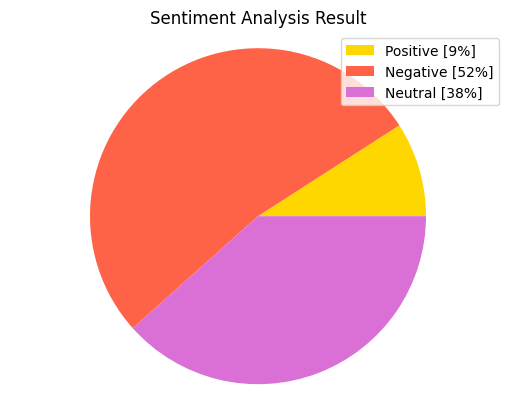

In [ ]:
positive = int(100*len(df_positive)/len(df))
negative = int(100*len(df_negative)/len(df))
neutral = int(100*len(df_neutral)/len(df))

labels = [f'Positive [{str(positive)}%]', f'Negative [{str(negative)}%]', f'Neutral [{str(neutral)}%]']

sizes = [positive, negative, neutral]
colors = ['gold','tomato','orchid']

patches, texts = plt.pie(sizes,colors=colors)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result")
plt.axis("equal")
plt.show()

In [ ]:
tweets_agg_df = df.groupby(["date", "sentiment_label"])["hashtags"].count().reset_index()[0:15]
tweets_agg_df.columns = ["date", "sentiment_label", "count"]
tweets_agg_df

date sentiment_label  count
0   2023-02-06        negative  26563
1   2023-02-06         neutral  17266
2   2023-02-06        positive   4133
3   2023-02-07        negative  21911
4   2023-02-07         neutral  16669
5   2023-02-07        positive   3392
6   2023-02-08        negative  11788
7   2023-02-08         neutral   9113
8   2023-02-08        positive   1941
9   2023-02-09        negative   6097
10  2023-02-09         neutral   5235
11  2023-02-09        positive   1511
12  2023-02-10        negative   1132
13  2023-02-10         neutral    956
14  2023-02-10        positive    379

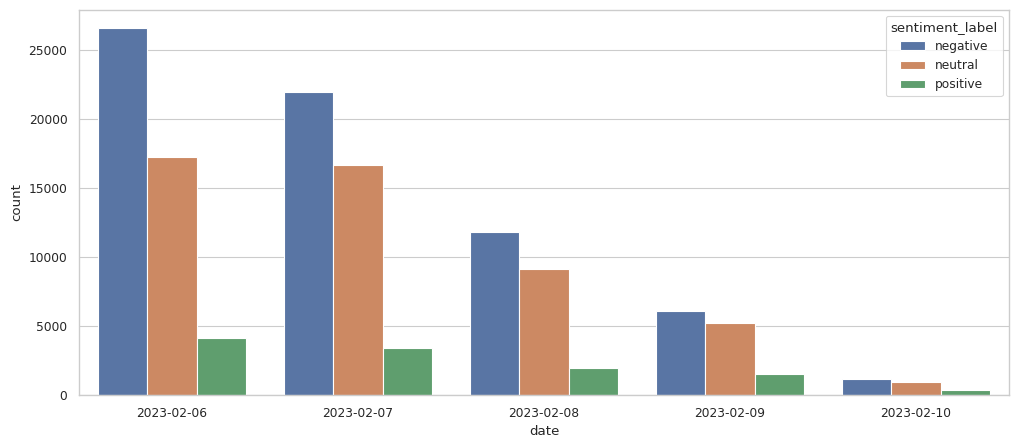

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(x = 'date', y = 'count', hue = 'sentiment_label', data = tweets_agg_df);

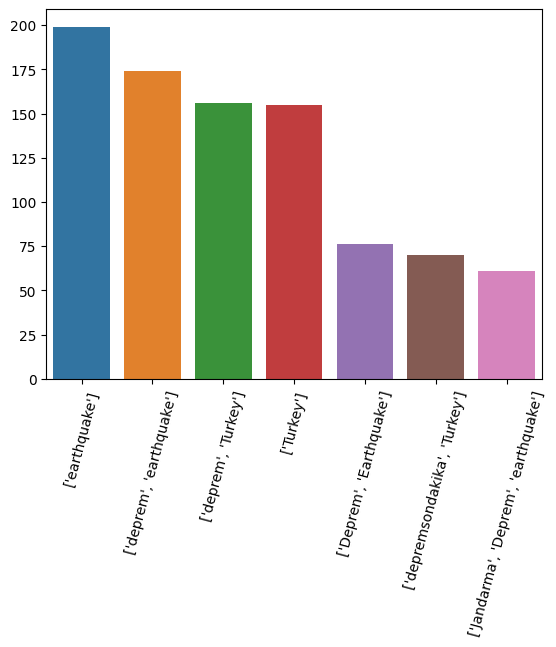

In [ ]:
hashtags = df['hashtags'].value_counts().nlargest(7)
sns.barplot(x=hashtags.index, y=top_hashtags.values)
plt.xticks(rotation=75)
plt.show()

### WORD CLOUDS

In [ ]:
# turkish stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('turkish'))
print(STOPWORDS)

# adding missing stopwords
STOPWORDS.update(('türkiye','deprem','hiçbir', 'bir', 'the', 'to', 'kadar'))

{'niçin', 'mu', 'mü', 'şu', 'sanki', 'gibi', 'daha', 'birkaç', 'ki', 'için', 'hep', 'veya', 'de', 'hiç', 'niye', 'belki', 'birşey', 'diye', 'biri', 'o', 'kez', 'neden', 'ya', 'eğer', 'biz', 'nereye', 'mı', 'en', 'aslında', 'da', 'bazı', 'tüm', 'ama', 'hepsi', 'ile', 'kim', 'nerde', 'her', 'nasıl', 'çok', 'ise', 'defa', 'nerede', 'bu', 'siz', 'az', 'acaba', 'çünkü', 'yani', 'ne', 'hem', 'şey', 've'}


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
tweet_all_texts = " ".join(t for t in df.content)
print("All tweets consist of {0} words.".format(len(tweet_all_texts)))

All tweets consist of 815206 words.


In [ ]:
tweet_positive_texts = " ".join(t for t in df_positive.content)
print("All positive tweets consist of {0} words".format(len(tweet_positive_texts)))

All positive tweets consist of 123919 words


In [ ]:
tweet_negative_texts = " ".join(t for t in df_negative.content)
print("All negative tweets consist of {0} words".format(len(tweet_negative_texts)))

All negative tweets consist of 427869 words


In [ ]:
def generate_word_cloud(tweets, status):

    print(len(tweets))

    wordcloud = WordCloud(max_words = 500,
        width=800, 
        height=400,
        background_color = 'black',
        stopwords = STOPWORDS).generate(str(tweets))
    
    plt.figure(figsize=(20,10), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

In [ ]:
def generate_word_cloud_from_frequencies(freq_dict, status):

    print(len(fdist_filtered))

    wordcloud = WordCloud(
        width=800, 
        height=400,
        background_color = 'black',
        stopwords = STOPWORDS).generate_from_frequencies(frequencies=freq_dict)
    
    plt.figure(figsize=(20,10), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

In [ ]:
token_words = word_tokenize(tweet_all_texts)
print(token_words)
print(len(token_words))

['hayatını', 'kaybeden', 'çocukların', 'anısına', 'bazı', 'enkazların', 'üzerine', 'balon', 'vatan', 'hainleri', 'yine', 'tag', 'en', 'okullar', 'açik', 'açik', 'malliğinizdan', 'her', 'şeyden', 'daha', 'kalin', 'kafaniza', 'sokun', 'bizi', 'sal', 'artık', 'türkiyenin', 'güneyi', 've', 'suriyede', 'büyüklüğündeki', 'deprem', 'şoku', 'bir', 'kez', 'daha', 'son', 'günlerde', 'meydana', 'gelen', 'deprem', 'nedeniyle', 'bin', 'ölüm', 'korkusu', 'var', 've', 'yüzlerce', 'bina', 'yıkıldı', 'allah', 'bizi', 'bize', 'merhamet', 'selocum', 'onlar', 'istifa', 'devlet', 'malı', 'deniz', 'yemeyen', 'domuz', 'diyerek', 'yiyorlar', 've', 'iban', 'paylaşmak', 'için', 'fırsat', 'paylaşanları', 'taner', 'savut', '9899', 'yıllarında', 'joachim', 'beğendiği', 've', 'oynattığı', 'oyunculardandı', 'mekanı', 'cennet', 'olsun', 'ali', 'koç', 'bu', 'ülkede', 'geçer', 'dediğimiz', 'hiç', 'bi', 'şey', 'geçmiyor', 'daha', 'da', 'kötüye', 'uyku', 'tutmuyo', 'nefes', 'alsan', 'deprem', 'oluyo', 'saniyosun', 'ne', 

In [ ]:
stop_words = STOPWORDS

token_words_clean_ = [w for w in token_words if not w in stop_words and len(w)>1]
print(token_words_clean_)
print(len(token_words_clean_))

['hayatını', 'kaybeden', 'çocukların', 'anısına', 'enkazların', 'üzerine', 'balon', 'vatan', 'hainleri', 'yine', 'tag', 'okullar', 'açik', 'açik', 'malliğinizdan', 'şeyden', 'kalin', 'kafaniza', 'sokun', 'bizi', 'sal', 'artık', 'türkiyenin', 'güneyi', 'suriyede', 'büyüklüğündeki', 'şoku', 'son', 'günlerde', 'meydana', 'gelen', 'nedeniyle', 'bin', 'ölüm', 'korkusu', 'var', 'yüzlerce', 'bina', 'yıkıldı', 'allah', 'bizi', 'bize', 'merhamet', 'selocum', 'onlar', 'istifa', 'devlet', 'malı', 'deniz', 'yemeyen', 'domuz', 'diyerek', 'yiyorlar', 'iban', 'paylaşmak', 'fırsat', 'paylaşanları', 'taner', 'savut', '9899', 'yıllarında', 'joachim', 'beğendiği', 'oynattığı', 'oyunculardandı', 'mekanı', 'cennet', 'olsun', 'ali', 'koç', 'ülkede', 'geçer', 'dediğimiz', 'bi', 'geçmiyor', 'kötüye', 'uyku', 'tutmuyo', 'nefes', 'alsan', 'oluyo', 'saniyosun', 'zaman', 'biticek', 'artik', 'kabus', 'geçmiş', 'artık', 'hataya', 'dayan', 'söylemekten', 'ayıp', 'dayanacak', 'hatayda', 'şiddetinde', 'meydana', 'gele

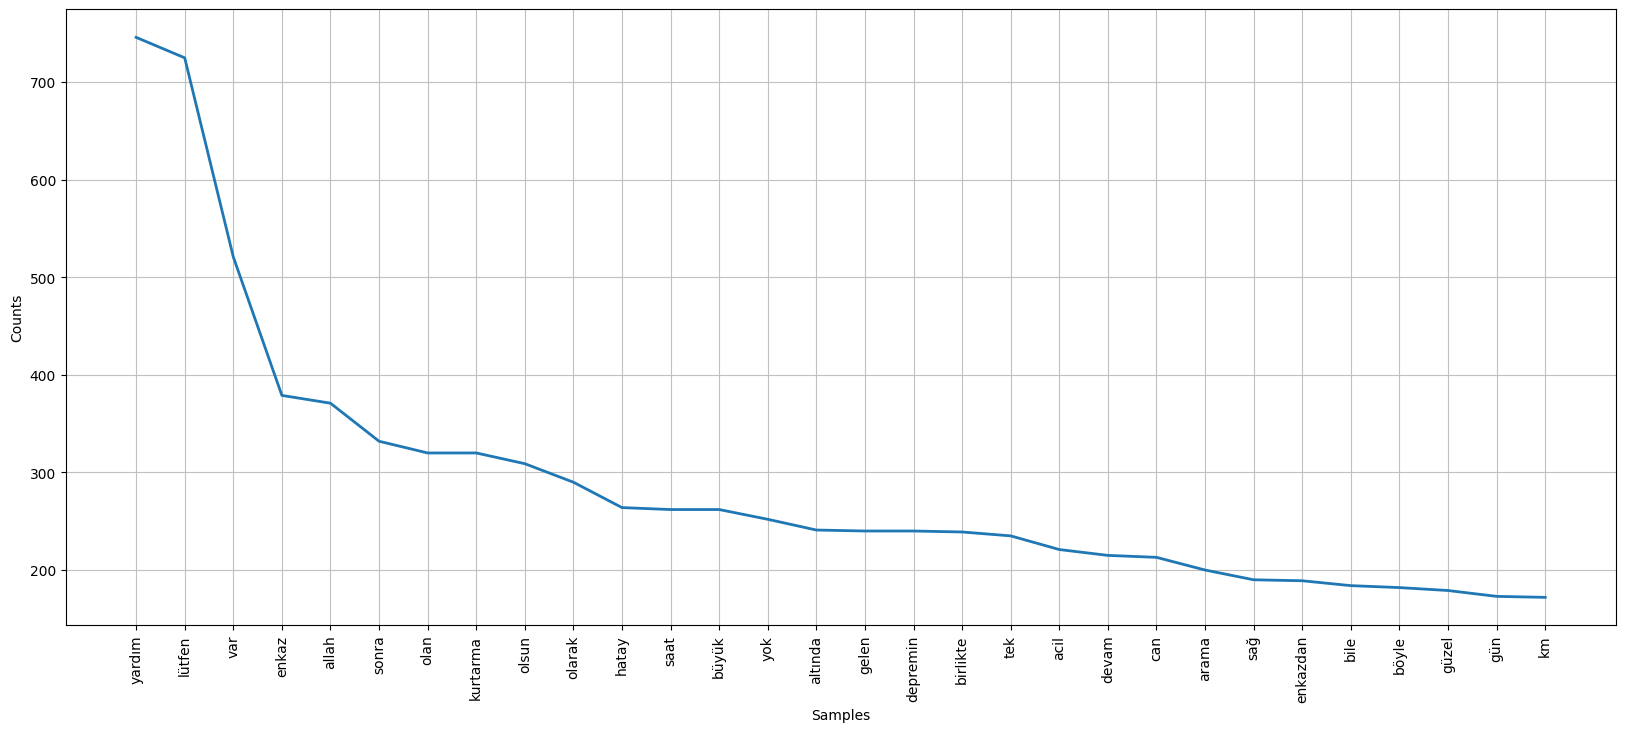

In [ ]:
fdist_filtered = FreqDist(token_words_clean_)
plt.figure(figsize=(20, 8))
fdist_filtered.plot(30);

In [ ]:
from collections import Counter

d = Counter(fdist_filtered)
d.most_common(100)

[('yardım', 746),
 ('lütfen', 725),
 ('var', 521),
 ('enkaz', 379),
 ('allah', 371),
 ('sonra', 332),
 ('olan', 320),
 ('kurtarma', 320),
 ('olsun', 309),
 ('olarak', 290),
 ('hatay', 264),
 ('saat', 262),
 ('büyük', 262),
 ('yok', 252),
 ('altında', 241),
 ('gelen', 240),
 ('depremin', 240),
 ('birlikte', 239),
 ('tek', 235),
 ('acil', 221),
 ('devam', 215),
 ('can', 213),
 ('arama', 200),
 ('sağ', 190),
 ('enkazdan', 189),
 ('bile', 184),
 ('böyle', 182),
 ('güzel', 179),
 ('gün', 173),
 ('km', 172),
 ('destek', 172),
 ('arkadaşlar', 171),
 ('son', 169),
 ('türk', 168),
 ('hala', 165),
 ('bin', 160),
 ('ses', 159),
 ('in', 158),
 ('sen', 156),
 ('insanlar', 156),
 ('depremden', 154),
 ('değil', 154),
 ('bizim', 152),
 ('depremde', 146),
 ('mi', 145),
 ('mahallesi', 139),
 ('kahramanmaraş', 138),
 ('turkey', 137),
 ('kişi', 136),
 ('bölgesine', 136),
 ('afad', 135),
 ('insan', 134),
 ('artık', 132),
 ('devlet', 132),
 ('ben', 132),
 ('bunu', 131),
 ('sadece', 129),
 ('çadır', 125),
 (

In [ ]:
len(fdist_filtered)

26129

26129


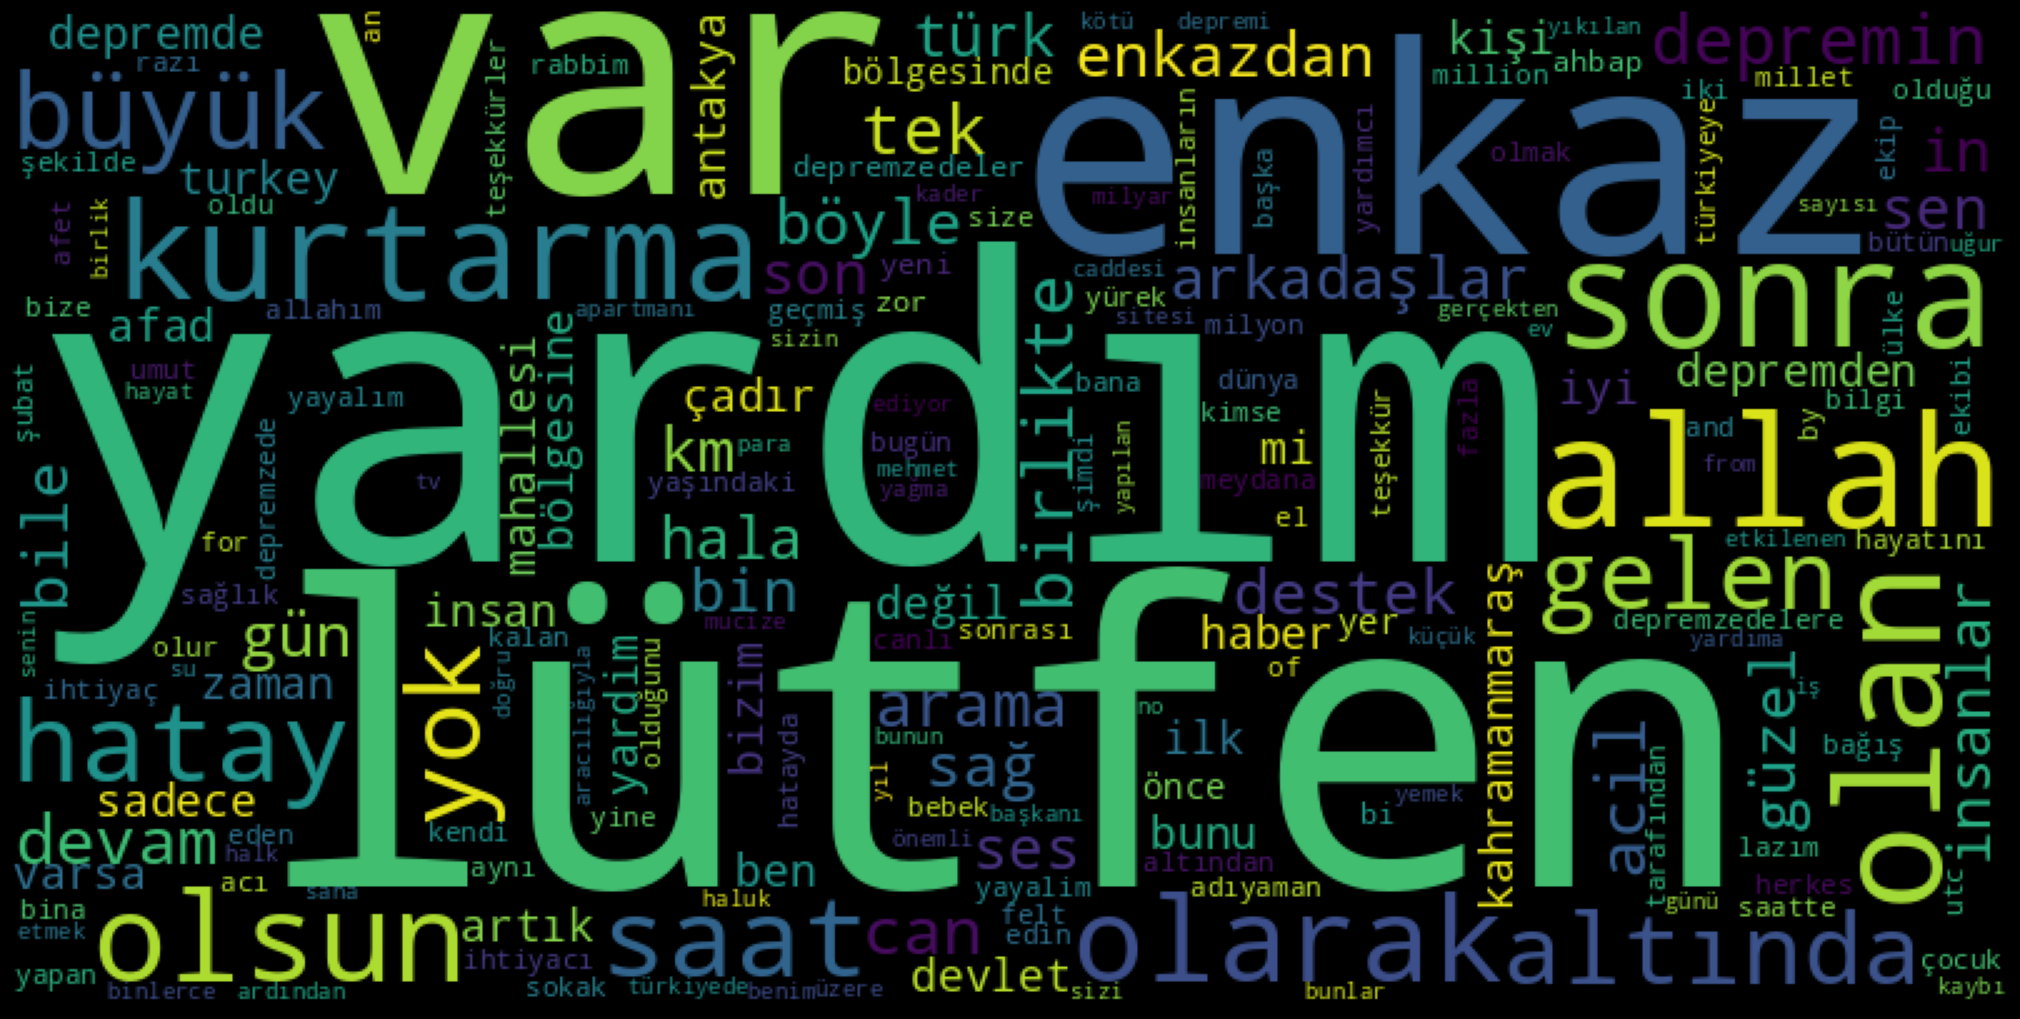

In [ ]:
generate_word_cloud_from_frequencies(fdist_filtered, "all")

In [ ]:
token_positive_words = word_tokenize(tweet_positive_texts)
print(token_positive_words)
print(len(token_positive_words))

['taner', 'savut', '9899', 'yıllarında', 'joachim', 'beğendiği', 've', 'oynattığı', 'oyunculardandı', 'mekanı', 'cennet', 'olsun', 'ali', 'koç', 'pray', 'for', 'türkiye', 'pray', 'for', 'türkiye', 'çok', 'geçmiş', 'olsun', 'türkiye', 've', 'dünyaın', 'herkes', 'senin', 'için', 'güçlü', 'kal', 'depremden', 'önce', 'allah', 'korusun', 'inşallah', 'bir', 'şey', 'olmaz', 'ama', 'tedirginim', 'gider', 'ya', 'allah', 'dualarını', 'kabul', 'hasbunallah', 'another', 'earthquake', 'hits', 'southern', 'turkey', 'yüce', 'allah', 'hastalara', 'acil', 'şifalar', 'ölenlere', 'cenneti', 'nasib', 'türkiye', 'iyi', 'müslümanlarla', 'dolu', 'bir', 'türkiyeyi', 'gerçekten', 'allah', 'ülkenin', 'yardımcısı', 'allahim', 'sen', 'yardimcisi', 'vatanimizi', 'senden', 'başkasina', 'muhtaç', 'etme', 'dualarım', 'türkiye', 'ile', 'ya', 'allah', 'türkiyeye', 'rahmet', 'eylesin', 'again', 'allahım', 'sen', 'bizi', 'koru', 'sallanma', 'başlamadan', 'elektrik', 'neden', 'sonra', 'gökyüzüm', 'aydınlanıyor', 'allah', 

In [ ]:
print(len(token_positive_words))

135769


In [ ]:
token_positive_words_clean_ = [w for w in token_positive_words if not w in stop_words and len(w)>1]
print(token_positive_words_clean_)
print(len(token_positive_words_clean_))

['taner', 'savut', '9899', 'yıllarında', 'joachim', 'beğendiği', 'oynattığı', 'oyunculardandı', 'mekanı', 'cennet', 'olsun', 'ali', 'koç', 'pray', 'for', 'pray', 'for', 'geçmiş', 'olsun', 'dünyaın', 'herkes', 'senin', 'güçlü', 'kal', 'depremden', 'önce', 'allah', 'korusun', 'inşallah', 'olmaz', 'tedirginim', 'gider', 'allah', 'dualarını', 'kabul', 'hasbunallah', 'another', 'earthquake', 'hits', 'southern', 'turkey', 'yüce', 'allah', 'hastalara', 'acil', 'şifalar', 'ölenlere', 'cenneti', 'nasib', 'iyi', 'müslümanlarla', 'dolu', 'türkiyeyi', 'gerçekten', 'allah', 'ülkenin', 'yardımcısı', 'allahim', 'sen', 'yardimcisi', 'vatanimizi', 'senden', 'başkasina', 'muhtaç', 'etme', 'dualarım', 'allah', 'türkiyeye', 'rahmet', 'eylesin', 'again', 'allahım', 'sen', 'bizi', 'koru', 'sallanma', 'başlamadan', 'elektrik', 'sonra', 'gökyüzüm', 'aydınlanıyor', 'allah', 'sonumuzu', 'pray', 'for', 'turkey', 'allah', 'hifazat', 'farma', 'hatayda', 'bal', 'gücünde', 'allah', 'özü', 'olsun', 'bilimin', 'dini',

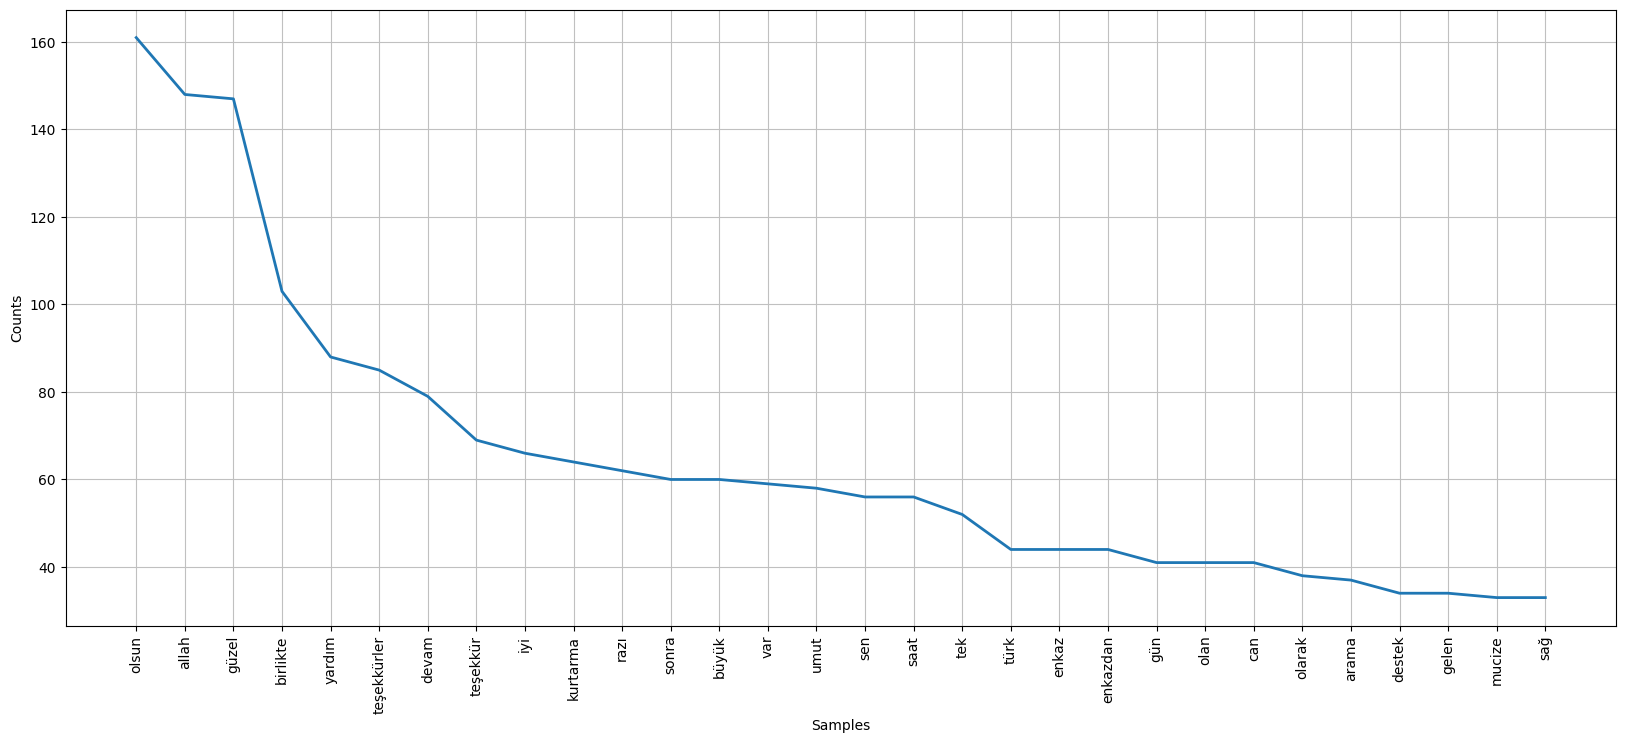

In [ ]:
fdist_filtered_positive = FreqDist(token_positive_words_clean_)  # kelime listesini gruplayıp saymak için bir kütüphane
plt.figure(figsize=(20, 8))
fdist_filtered_positive.plot(30);

26129


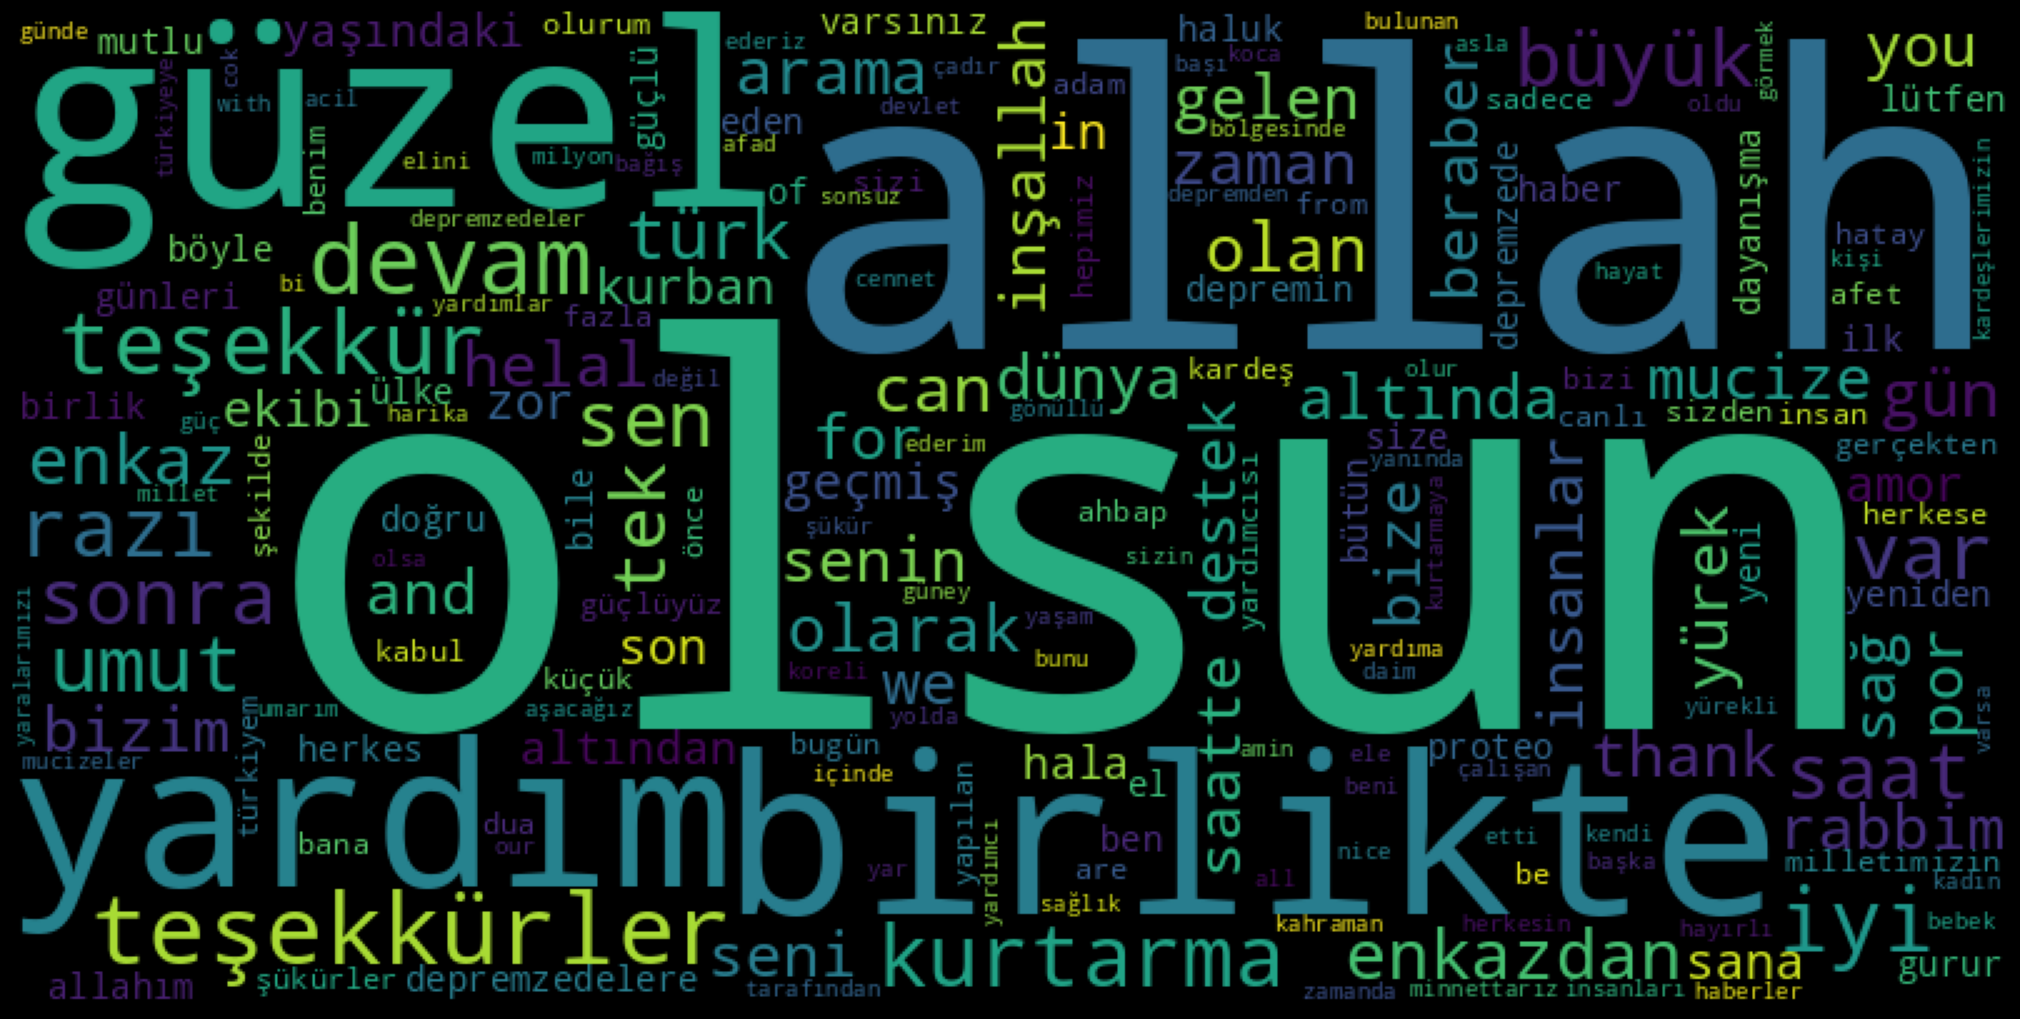

In [ ]:
generate_word_cloud_from_frequencies(fdist_filtered_positive, "positive")

In [ ]:
token_negative_words = word_tokenize(tweet_negative_texts)
print(token_negative_words)
print(len(token_negative_words))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
token_negative_words_clean_ = [w for w in token_negative_words if not w in stop_words and len(w)>1]
print(token_negative_words_clean_)
print(len(token_negative_words_clean_))

['vatan', 'hainleri', 'yine', 'tag', 'okullar', 'açik', 'açik', 'malliğinizdan', 'şeyden', 'kalin', 'kafaniza', 'sokun', 'bizi', 'sal', 'artık', 'türkiyenin', 'güneyi', 'suriyede', 'büyüklüğündeki', 'şoku', 'son', 'günlerde', 'meydana', 'gelen', 'nedeniyle', 'bin', 'ölüm', 'korkusu', 'var', 'yüzlerce', 'bina', 'yıkıldı', 'allah', 'bizi', 'bize', 'merhamet', 'selocum', 'onlar', 'istifa', 'devlet', 'malı', 'deniz', 'yemeyen', 'domuz', 'diyerek', 'yiyorlar', 'iban', 'paylaşmak', 'fırsat', 'paylaşanları', 'ülkede', 'geçer', 'dediğimiz', 'bi', 'geçmiyor', 'kötüye', 'uyku', 'tutmuyo', 'nefes', 'alsan', 'oluyo', 'saniyosun', 'zaman', 'biticek', 'artik', 'kabus', 'geçmiş', 'artık', 'hataya', 'dayan', 'söylemekten', 'ayıp', 'dayanacak', 'hatayda', 'şiddetinde', 'meydana', 'gelen', 'adana', 'şehir', 'böyle', 'yaa', 'allah', 'rehma', 'öldüren', 'halkın', 'dayanışmasını', 'halkın', 'gücü', 'komitelerinde', 'halkımız', 'yeni', 'depremler', 'yaşarken', 'devlet', 'göstermelik', 'olarak', 'yaptığı', '

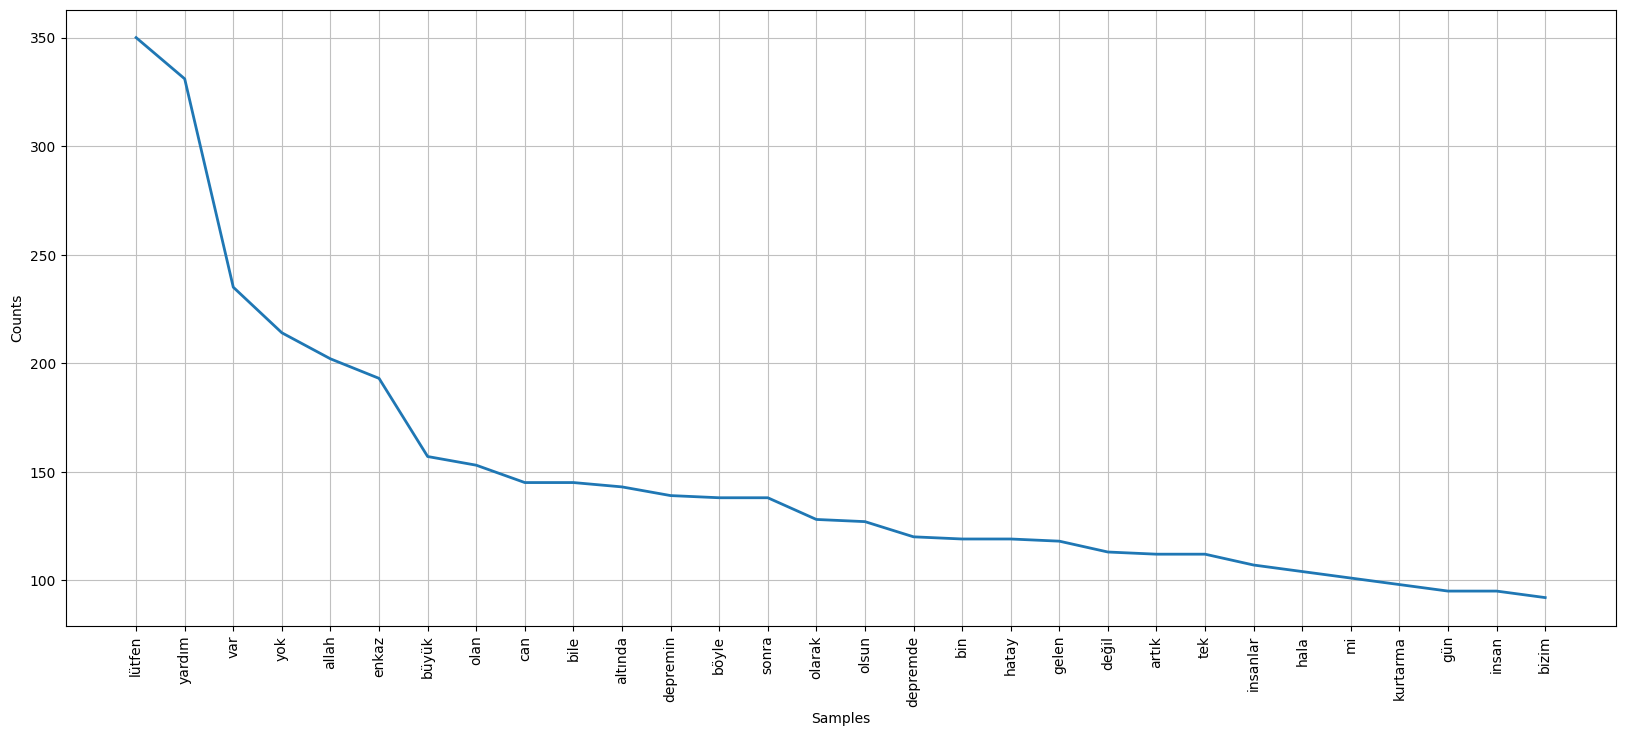

In [ ]:
fdist_filtered_negative = FreqDist(token_negative_words_clean_)
plt.figure(figsize=(20, 8))
fdist_filtered_negative.plot(30);

In [ ]:
d = Counter(fdist_filtered_negative)
d.most_common(100)

[('lütfen', 16726),
 ('yardım', 16497),
 ('enkaz', 7159),
 ('var', 6406),
 ('yok', 6277),
 ('altında', 5823),
 ('hatay', 5123),
 ('yardim', 4945),
 ('allah', 4736),
 ('hala', 4152),
 ('edin', 3944),
 ('haber', 3774),
 ('insanlar', 3737),
 ('acil', 3528),
 ('olsun', 3301),
 ('mahallesi', 3284),
 ('olan', 2435),
 ('göçük', 2249),
 ('bile', 2215),
 ('insan', 2184)]

26129


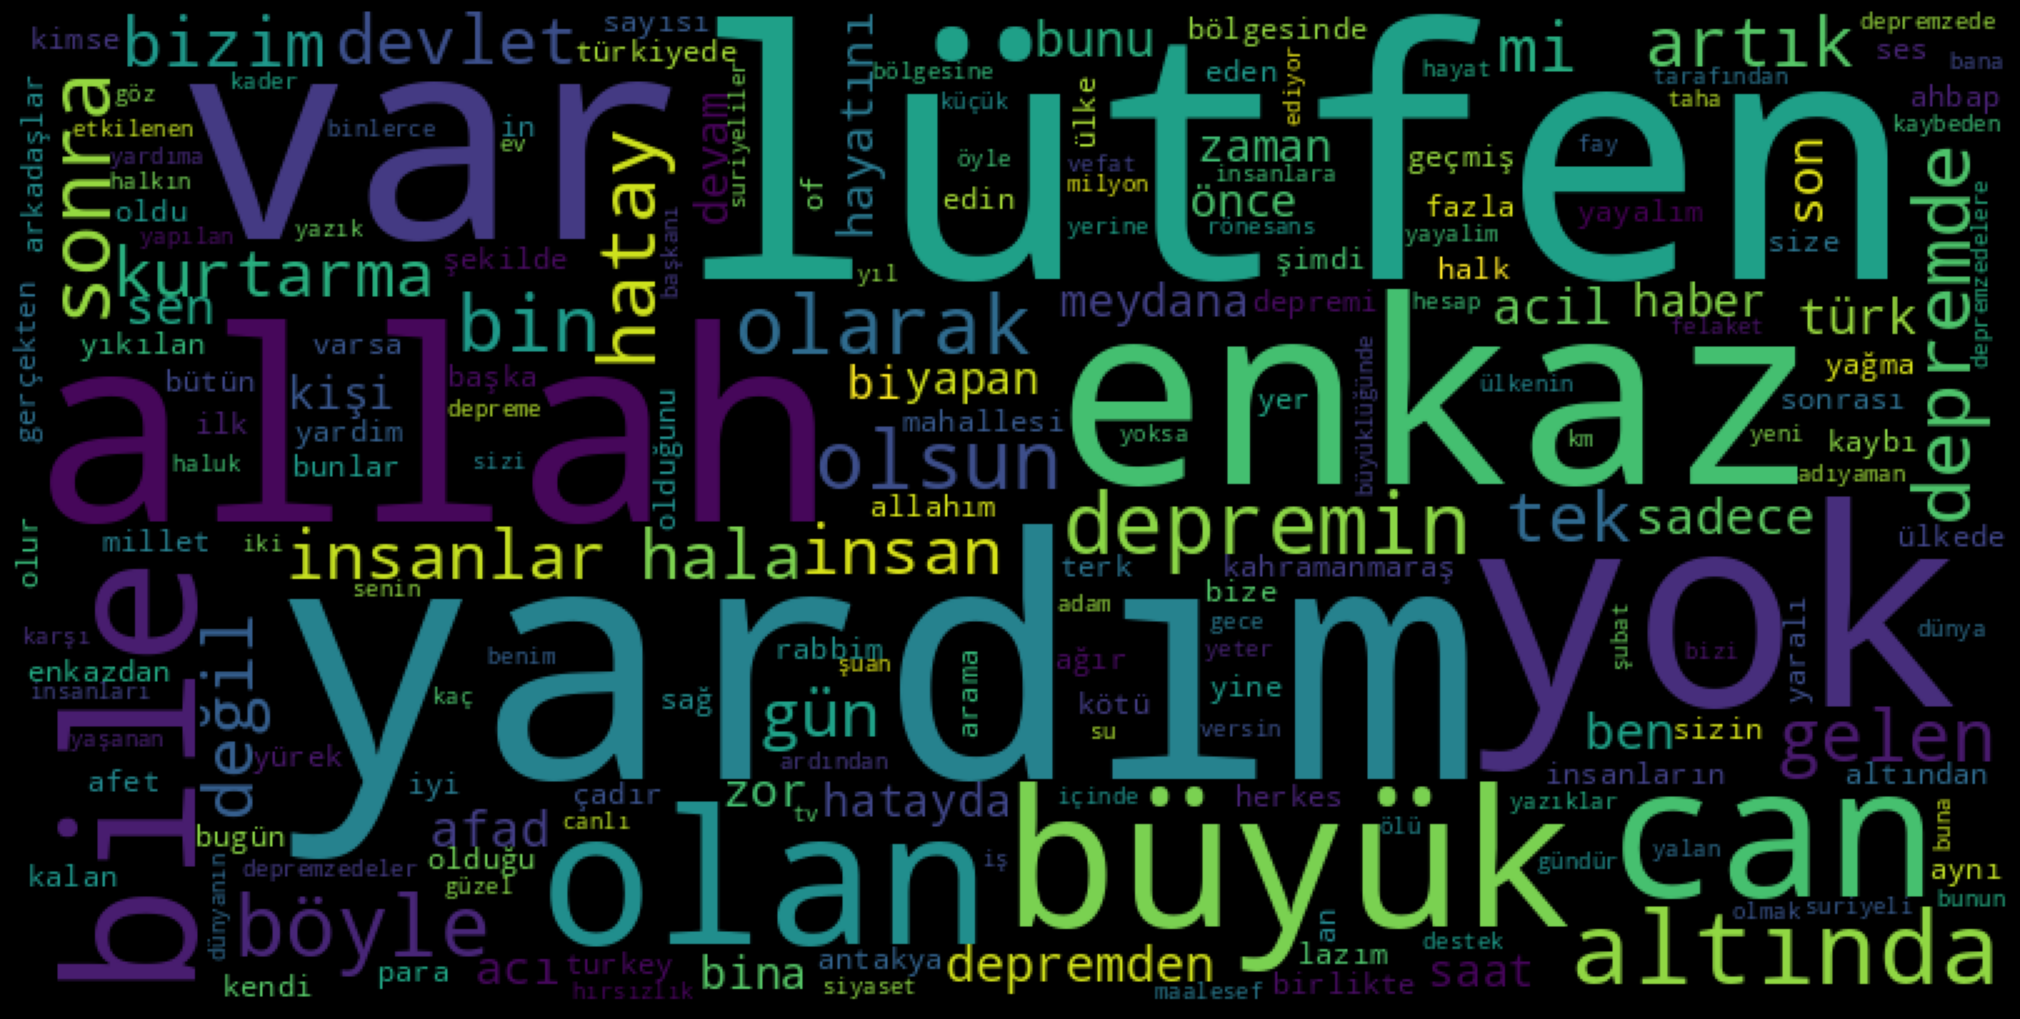

In [ ]:
generate_word_cloud_from_frequencies(fdist_filtered_negative, "negative")